In [20]:
import numpy as np
from utils.utils import *
from tqdm import tqdm
from torchvision import transforms
from utils.model import *
from utils.BYOL_models import *
import os

In [21]:
# ('mnist', 'femnist', 'fmnist', 'cifar10', 'cifar100', 'svhn')
data_path = "./data"
dataset = "cifar10"
# ('noniid-labeldir', 'noniid-label#2', 'iid', 'default') default only for femnist
partition = "noniid-label#2"
client_num = 5
batch_size = 32
train_batch = 32
test_batch = 128
avg_freq = 10
sim_weight = False
save_path = f"./model/SplitFSSL_BYOL32_similarity/resnet18Maxpooling_sim_weight({sim_weight})_{dataset}_{batch_size}_{avg_freq}_{partition}_{client_num}"
train_dl, test_dl, train_ds, test_ds = get_dataloader(dataset, data_path, train_batch, test_batch)

# dataset = "cifar10"
# cifar10train_dl, cifar10test_dl, cifar10train_ds, cifar10test_ds = get_dataloader(dataset, data_path, train_batch, test_batch)

Files already downloaded and verified
Files already downloaded and verified


In [11]:
net_dataidx_map, net_dataidx_map_test, traindata_cls_counts, testdata_cls_counts = partition_data(dataset, data_path, partition, client_num)

Files already downloaded and verified
Files already downloaded and verified
partition: iid
Data statistics Train: {0: {0: 81, 1: 109, 2: 113, 3: 104, 4: 103, 5: 104, 6: 94, 7: 88, 8: 114, 9: 106, 10: 103, 11: 114, 12: 90, 13: 90, 14: 94, 15: 93, 16: 96, 17: 111, 18: 94, 19: 108, 20: 100, 21: 104, 22: 88, 23: 100, 24: 97, 25: 90, 26: 96, 27: 98, 28: 98, 29: 95, 30: 102, 31: 105, 32: 99, 33: 110, 34: 96, 35: 98, 36: 107, 37: 108, 38: 109, 39: 87, 40: 114, 41: 107, 42: 110, 43: 105, 44: 108, 45: 105, 46: 90, 47: 88, 48: 108, 49: 100, 50: 100, 51: 117, 52: 92, 53: 92, 54: 101, 55: 98, 56: 91, 57: 99, 58: 112, 59: 113, 60: 91, 61: 101, 62: 108, 63: 105, 64: 87, 65: 97, 66: 101, 67: 115, 68: 103, 69: 89, 70: 96, 71: 92, 72: 98, 73: 99, 74: 111, 75: 104, 76: 110, 77: 83, 78: 86, 79: 107, 80: 98, 81: 104, 82: 104, 83: 93, 84: 101, 85: 97, 86: 106, 87: 90, 88: 90, 89: 103, 90: 100, 91: 100, 92: 92, 93: 94, 94: 106, 95: 105, 96: 101, 97: 98, 98: 99, 99: 90}, 1: {0: 127, 1: 95, 2: 99, 3: 104, 4: 

In [12]:
for idx in traindata_cls_counts:
    counts = []
    for num in traindata_cls_counts[idx]:
        counts.append(traindata_cls_counts[idx][num])
    print(f"client {idx} : {np.sum(counts)}")

client 0 : 10000
client 1 : 10000
client 2 : 10000
client 3 : 10000
client 4 : 10000


In [14]:
net = ResNet18()
client_model = BYOL_Client()
client_models = [copy.deepcopy(client_model) for idx in range(2)]
# checkpath = save_path + "/checkpoint.pth.tar" 
# checkpoint = torch.load(checkpath)
# epoch = checkpoint['glepoch']
# print(epoch)
# client_models = [copy.deepcopy(client_model).cuda() for idx in range(client_num)]
client_models[0].online_encoder.fc = nn.Sequential(nn.Linear(4, 2), nn.Linear(2, 4))
client_models[1].online_encoder.fc = nn.Sequential(nn.Linear(4, 2), nn.Linear(2, 4))
# print(client_model.online_encoder.fc)
for client in client_models:
    print(client.online_encoder.fc)
    for key, param in client.online_encoder.fc.named_parameters():
        if param.requires_grad:
            print(f"key name : {key}, size : {param.size()}")
            print(client.online_encoder.fc.state_dict()[key])

Sequential(
  (0): Linear(in_features=4, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=4, bias=True)
)
key name : 0.weight, size : torch.Size([2, 4])
tensor([[-0.4531,  0.2462, -0.2034, -0.1425],
        [ 0.2795,  0.1217,  0.3998, -0.3489]])
key name : 0.bias, size : torch.Size([2])
tensor([ 0.1155, -0.4965])
key name : 1.weight, size : torch.Size([4, 2])
tensor([[-0.2313, -0.5572],
        [-0.0036, -0.2371],
        [ 0.5574,  0.0557],
        [ 0.3146,  0.6422]])
key name : 1.bias, size : torch.Size([4])
tensor([-0.2441, -0.6549,  0.2746,  0.0641])
Sequential(
  (0): Linear(in_features=4, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=4, bias=True)
)
key name : 0.weight, size : torch.Size([2, 4])
tensor([[-0.3831, -0.2123,  0.4655,  0.0431],
        [-0.4102, -0.2033, -0.0308,  0.2754]])
key name : 0.bias, size : torch.Size([2])
tensor([0.3249, 0.1709])
key name : 1.weight, size : torch.Size([4, 2])
tensor([[-0.3883,  0.0637],
        [ 

In [14]:
arr = torch.randn(10)
arr1 = torch.randn(10)
print(arr)
print(arr1)

tensor([-0.8071,  1.0899,  0.2509,  0.8833, -0.7634, -0.0605,  1.2478,  1.3313,
         0.6294,  0.5518])
tensor([ 0.2369, -0.2831,  0.0805,  0.0857,  1.2410, -0.1155, -2.2699,  0.4539,
         0.0473, -1.0381])


In [16]:
arr = torch.randn(10)
arr1 = torch.randn(10)
arr2 = np.array([0.024,0.064,0.175,0.475,0.024,0.064,0.175])

A1_norm = torch.norm(arr.type(torch.FloatTensor), 'fro')
A2_norm = torch.norm(arr1.type(torch.FloatTensor), 'fro')
A1_A2 = A1_norm * A2_norm
if A1_A2 == 0:
    print("There's a zero")
sim = ((arr*arr1).sum() / A1_A2).item()

print(sim)
# arr2.sum()


-0.03904921934008598


## plot similarity heatmap

In [26]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ipywidgets import interact
from PIL import Image

slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=30,
    step=1,
    description='Image:'
)
# 函数：根据索引显示图片
def show(opacity):
    print(f"{slider.value}")
    
def show_image(index):
    id = int(slider.value)
    image_path_0506 = save_path + f"/similarity_mat(0506)/{id}_epoch" 
    image_path_0410 = save_path + f"/similarity_mat(0410)/{id}_epoch" 
    files = os.listdir(image_path_0506)
    files = [f for f in files if f.endswith('.png')]
    file_path = os.path.join(image_path_0506,files[-1])
    image_0506 = plt.imread(file_path)
    files = os.listdir(image_path_0410)
    files = [f for f in files if f.endswith('.png')]
    file_path = os.path.join(image_path_0410,files[-1])
    image_0410 = plt.imread(file_path)
    # plt.title(f"epoch_{id}")
    # plt.axis('off')
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].imshow(image_0506)
    axes[1].imshow(image_0410)
    # 顯示圖片
    # plt.imshow(image)
    plt.show()
# 创建滑动条并连接到显示图片的函数

In [27]:
slider.observe(show_image, names='value')
display(slider)

FloatSlider(value=0.0, description='Image:', max=30.0, step=1.0)

In [19]:
X_train, y_train, X_test, y_test = load_cifar10_data(data_path)

Files already downloaded and verified
Files already downloaded and verified


In [20]:
net_dataidx_map, net_dataidx_map_test, traindata_cls_counts, testdata_cls_counts = partition_data(dataset, data_path, partition, client_num)

Files already downloaded and verified
Files already downloaded and verified
partition: noniid-label#2
Data statistics Train: {0: {8: 5000, 9: 5000}, 1: {2: 5000, 3: 5000}, 2: {4: 5000, 5: 5000}, 3: {6: 5000, 7: 5000}, 4: {0: 5000, 1: 5000}}
Data statistics Test:
 {0: {8: 1000, 9: 1000}, 1: {2: 1000, 3: 1000}, 2: {4: 1000, 5: 1000}, 3: {6: 1000, 7: 1000}, 4: {0: 1000, 1: 1000}} 



In [6]:
cls_count = np.zeros([10,client_num], dtype=int)
for k in range(client_num):
    for i in traindata_cls_counts[k]:
        cls_count[i][k] = traindata_cls_counts[k][i]
print(cls_count)    

[[5000    0    0    0    0]
 [5000    0    0    0    0]
 [   0 5000    0    0    0]
 [   0 5000    0    0    0]
 [   0    0 5000    0    0]
 [   0    0 5000    0    0]
 [   0    0    0 5000    0]
 [   0    0    0 5000    0]
 [   0    0    0    0 5000]
 [   0    0    0    0 5000]]


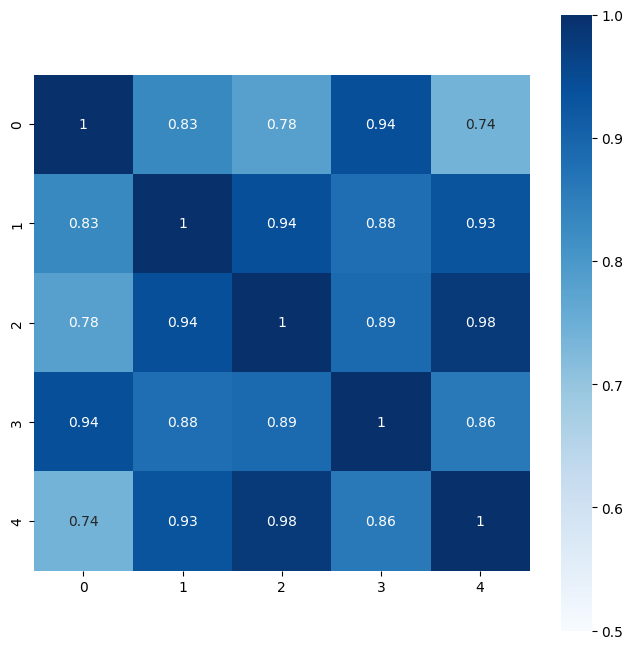

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
cls_count1 = [1,0.83,0.78,0.94,0.74]
cls_count = [[1,0.83,0.78,0.94,0.74],
             [0.83,1,0.94,0.88,0.93],
             [0.78,0.94,1,0.89,0.98],
             [0.94,0.88,0.89,1,0.86],
             [0.74,0.93,0.98,0.86,1]]
plt.figure(figsize=(8,8))
# sns.heatmap(cls_count, yticklabels=class_names, square=False,annot=True,fmt='d',linecolor='white',cmap='Blues',linewidths=1.5)
sns.heatmap(cls_count,square=True,annot=True,linecolor='white',cmap='Blues',vmin=0.5)
# plt.xlabel('client',fontsize=20)
# plt.ylabel('class',fontsize=20)
plt.show()

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # 导入 LogNorm 类

# 创建一个示例数据
data = np.random.rand(5, 5)  # 创建一个 5x5 的随机数组

for i in data:
    weight = torch.softmax(torch.tensor(i), dim=0)
print(weight)
# 绘制热力图
# sns.heatmap(data, annot=True, cmap='Blues_r', norm=LogNorm())  # 设置 norm 参数为 LogNorm 类
# plt.show()

tensor([0.0985, 0.2354, 0.2318, 0.2026, 0.2318], dtype=torch.float64)


In [53]:
a = weight[0].data
print(a)

tensor(0.2096, dtype=torch.float64)


# Client Dataloader test

In [21]:
train_loader_list = []
test_loader_list = []
for idx in range(client_num):
    
    dataidxs = net_dataidx_map[idx]
    if net_dataidx_map_test is None:
        dataidx_test = None 
    else:
        dataidxs_test = net_dataidx_map_test[idx]

    train_dl_local, test_dl_local, train_ds_local, test_ds_local = get_dataloader(dataset, 
                                                                   data_path, train_batch, test_batch, 
                                                                   dataidxs, dataidxs_test)
    train_loader_list.append(train_dl_local)
    test_loader_list.append(test_dl_local)


# 圖像測試

In [112]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict
    
file = "./data/cifar-100-python/meta"
dict = unpickle(file)

In [113]:
label_name = {i : "" for i in range(100)}

for id, name in enumerate(dict["fine_label_names"]):
    label_name[id] = name

In [117]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt


X_train = train_ds.data
y_train = train_ds.target

# X_train_id = np.where(y_train == 1)[0]

def show_img(value):
    id = int(slider.value)
    # id = X_train_id[id]
    img1 = X_train[id]
    tensor_to_pil = transforms.ToPILImage()
    img1 = tensor_to_pil(img1)
    fig, axes = plt.subplots(1, 1, figsize=(10, 4))
    axes.imshow(img1)
    plt.title(label_name[y_train[id]])
    plt.show()

In [118]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ipywidgets import interact
from PIL import Image

slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=10000,
    step=1,
    description='Image:'
)

In [119]:
slider.observe(show_img, names='value')
display(slider)

FloatSlider(value=0.0, description='Image:', max=10000.0, step=1.0)

# Batch 訓練測試

In [22]:
num_batch = 0
for i in train_loader_list:
    if num_batch < len(i):
        num_batch = len(i)

In [26]:
data_count = []
num_batch = 300
for client_id in range(client_num):
    count = 0
    
    # p_bar = tqdm(range(num_batch))
    batch = iter(train_loader_list[client_id])
    for i in range(num_batch):
        try:
            img1, img2, target = next(batch)
            
        except StopIteration:
            batch = iter(train_loader_list[client_id])
            img1, img2 = next(batch)

        img1, img2 = img1.cuda(), img2.cuda()
        online_proj_one, online_proj_two, target_proj_one, target_proj_two = client_models[0](img1, img2)

        print(online_proj_one)
        break
        count += img1.size(0)
        # p_bar.update()
    data_count.append(count)
    # p_bar.close()


tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='cuda:0',
       grad_f